In [23]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

# import user functions
from mMTC.ZC_sequence import zc_sequence, zc_shift, auto_correlation

In [28]:
# ZC-sequence params
NZC = 5
r = 1

# Generate ZC-sequence
n_values = np.arange(0, NZC)
z_values = zc_sequence(r, NZC)

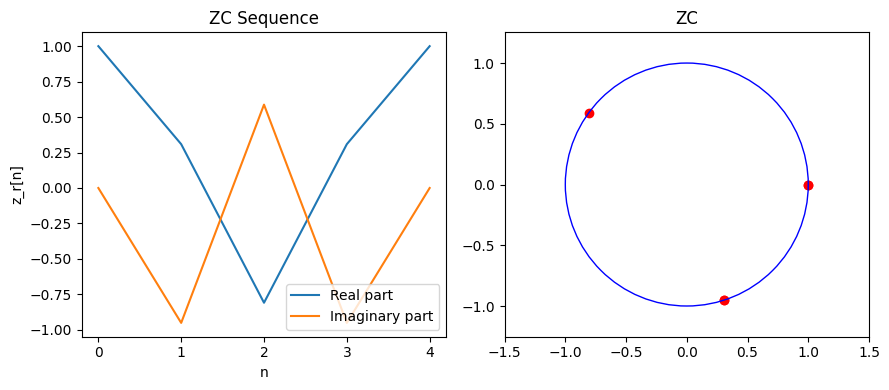

In [29]:
# Plot the ZC sequence
plt.figure(figsize=(9, 4))

# Plot ZC sequence
plt.subplot(1, 2, 1)
plt.plot(n_values, np.real(z_values), label='Real part')
plt.plot(n_values, np.imag(z_values), label='Imaginary part')
plt.xlabel('n')
plt.ylabel('z_r[n]')
plt.title('ZC Sequence')
plt.legend(loc='lower right')

# Plot Complex Plane with Complex numbers and circle
plt.subplot(1, 2, 2)
plt.scatter(np.real(z_values), np.imag(z_values), color='red', label=None, marker='o')
plt.title('ZC')
plt.axis('equal')
circle = plt.Circle((0, 0), radius=1, edgecolor='b', facecolor='none')
plt.gca().add_patch(circle)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.tight_layout()

plt.show()

In [30]:
# Create a DataFrame
df = pd.DataFrame({'ZC squence':  np.round(z_values, decimals=4)})

# Display the DataFrame
df

,ZC squence
0,1.0000+0.0000j
1,0.3090-0.9511j
2,-0.8090+0.5878j
3,0.3090-0.9511j
4,1.0000+0.0000j


In [32]:
# ZC sequence params
NZC = 5
r = 1
p = 0
# Accuracy
ACURANCY = 8

# Simulate ZC-sequence auto-correlation test
n_values = np.arange(0, NZC)
z_values = zc_sequence(r, NZC)
z_p_values = zc_shift(p, z_values)

# Auto-correlation test
auto_correlate = auto_correlation(z_p_values, z_values, p)
print('Auto-correlation result: ', np.around(auto_correlate, decimals=ACURANCY))


# Cyclic-correlation test
print('\nCyclic auto-correlation result: ')
correlation_res = []
for tao in range(NZC):
    new_z_p_values = zc_shift(tao, z_values)
    cross_correlate = auto_correlation(z_p_values, new_z_p_values, tao)
    correlation_res.append(cross_correlate)

pd.DataFrame({
    'ZC squence':  np.around(np.array(correlation_res), decimals=ACURANCY),
    'Reduced ZC squence':  np.around(np.array(correlation_res) / NZC, decimals=ACURANCY),
})

Auto-correlation result:  (5+0j)

Cyclic auto-correlation result: 


,ZC squence,Reduced ZC squence
0,5.0+0.0j,1.0+0.0j
1,0.0-0.0j,0.0-0.0j
2,-0.0+0.0j,-0.0+0.0j
3,-0.0-0.0j,-0.0-0.0j
4,0.0+0.0j,0.0+0.0j
